# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

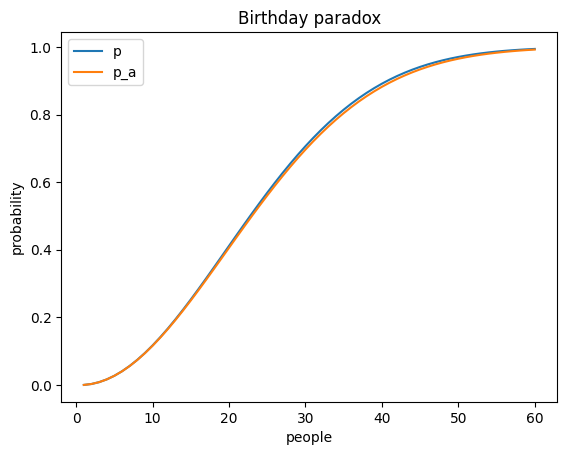

In [128]:
import numpy
import matplotlib.pyplot as plt

def silnia(a, b):
    res = 1
    for i in range(a, b + 1):
        res *= i
    return res
    
def p(d, n):
    return 1 - silnia(d-n+1, d) / d ** n

def pa(d, n):
    return 1 -  numpy.exp(-((n*(n-1))/(2*d)))
    
x = list(range(1, 61))
y = [p(365, n) for n in x]
plt.plot(x, y, label = "p")
ya = [pa(365, n) for n in x]
plt.plot(x, ya, label = "p_a")
plt.xlabel("people")
plt.ylabel("probability")
plt.title("Birthday paradox")
plt.legend()
plt.show()

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

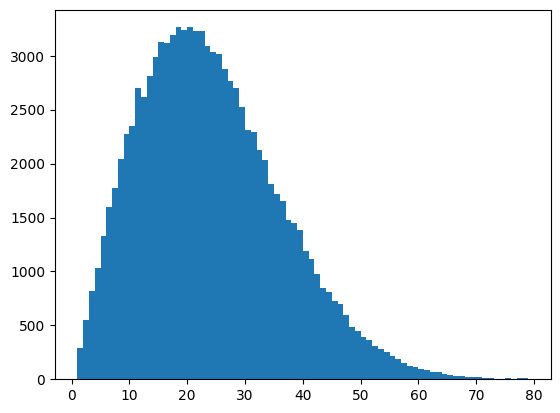

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

d = 365
N = 100000

def getRandom():
    return random.randrange(1, d) 


def func():
    mySet = set()
    date = getRandom()
    counter = 0

    while (date not in mySet):
        mySet.add(date)
        date = getRandom()
        counter += 1
        
    return counter

tab = [func() for i in range(N)]
plt.hist(tab, bins=range(1,80))
plt.show() 

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

(372, 3)


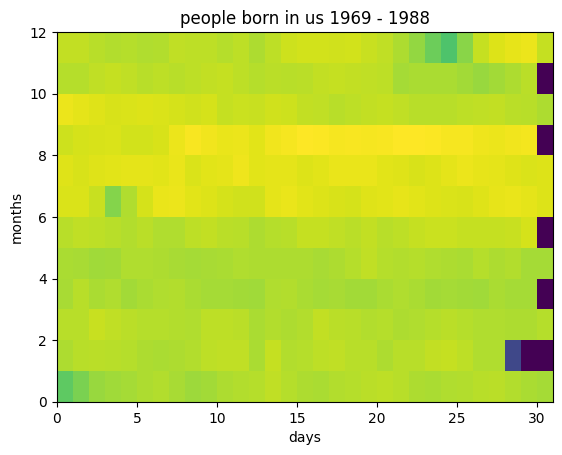

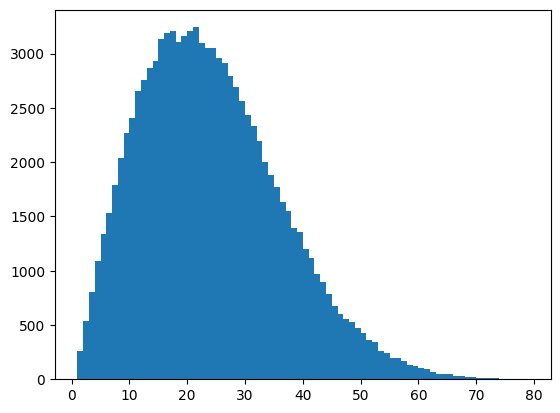

In [2]:
import numpy as np
import matplotlib.pylab as plt
import random

stats = np.loadtxt('us_births_69_88.csv', skiprows = 1, delimiter = ',', dtype = int)
print(stats.shape)

values = np.zeros((12,31))

for s in stats:
    values[s[0] - 1][s[1] - 1] = s[2]

plt.pcolormesh(values)
plt.xlabel("days")
plt.ylabel("months")
plt.title( 'people born in us 1969 - 1988' )
plt.show()

prefsum = np.cumsum(stats[:, 2])

born = prefsum[prefsum.size - 1]

d = 365
N = 100000

def getRandom():
    return random.randrange(1, born) 


def getRandomDate():
    a = getRandom()
    return np.searchsorted(prefsum, a)

def func():
    mySet = set()
    date = getRandomDate()
    counter = 0

    while (date not in mySet):
        mySet.add(date)
        date = getRandomDate()
        counter += 1
        
    return counter

tab = [func() for i in range(N)]
plt.hist(tab, bins=range(1,80))
plt.show() 